In [2]:
println("Hello Simplified Graph Convolutional Neural Nets on Community Structures!")

Hello Simplified Graph Convolutional Neural Nets on Community Structures!


In [3]:
using LinearAlgebra, Plots, LightGraphs, DelimitedFiles # GraphPlot
#using RCall

In [4]:
# GOAL OF RESEARCH
#prove kalashnikov was right by quoting him! 'what is simple is useful, what is complicated is useless'

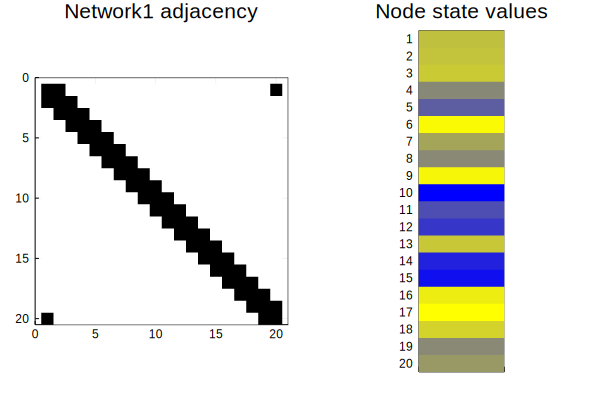

In [56]:
#Network 1
#Ring network of 40 nodes

#make the adjacency for the ring network
NN1 = 20

AdjNN1 = zeros(NN1,NN1)
for ii in 1:size(AdjNN1)[1]
    for jj in 1:size(AdjNN1)[2]            
        if(ii == (jj+1))
            AdjNN1[ii,jj] = 1
        elseif(ii == (jj-1))
            AdjNN1[ii,jj] = 1
        end        
    end
end
AdjNN1[1,NN1] = 1
AdjNN1[NN1,1] = 1

#make the diagonal for the adj matrix
diag1 = Diagonal(AdjNN1)
diag1 .+= 1
#add self-loops as the paper describes
AdjNN1 .+= diag1
#=
hAdjNN1 = heatmap(AdjNN1,title="Network1 adjacency",
    showaxis=true,xticks=true,yticks=true,yaxis=:flip,aspect_ratio=1.0,
    framestyle=:box,xlims=(0.5,NN1+0.5),legend=nothing,
    c=ColorGradient([:white,:black]))
=#
hAdjNN1 = heatmap(AdjNN1,title="Network1 adjacency",
    showaxis=true,yaxis=:flip,aspect_ratio=1.0,
    framestyle=:box,xlims=(0.0,NN1+1.0),legend=nothing,ylims=(0.0,NN1+0.5),
    yticks=0:5:NN1,xticks=0:5:NN1,
    c=ColorGradient([:white,:black]))

#display(hAdjNN1);
#node attributes (variables)
varX = rand(NN1,1)
[varX[i] = -1 * rand() for i in [5,10,11,12,14,15]]
varX = repeat(varX,outer=(1,6))
hVarX = heatmap(varX,title="Node state values",
    yaxis=:flip,aspect_ratio=1.0,
    framestyle=:box,legend=nothing,ylims=(0.5,NN1+0.5),
    yticks=0:1:NN1,xticks=(1:5:6,["" ""]),xlims=(1,6),
    c=ColorGradient([:blue,:yellow]))
p=plot(hAdjNN1,hVarX,layout=2)
display(p)
savefig(p,"sample.png")

In [136]:
#define associated vector of attributes for each node that can be eg [burger, pizza]
#define the identity of each node as training data

function redStr(pol)
    rpol = round(pol,digits=1)
  
    if(rpol == 1.0)
        return "#FF5555"
    elseif(rpol == 0.9)
        return "#FE5555"
    elseif(rpol == 0.8)
        return "#EE6666"    
     elseif(rpol == 0.7)
        return "#ED6666"
     elseif(rpol == 0.6)
        return "#DD7777" 
    elseif(rpol == 0.5)
        return "#DC7777"
        elseif(rpol == 0.4)
        return "#CC8888"
        elseif(rpol == 0.3)
        return "#CB8888"
        elseif(rpol == 0.2)
        return "#BB9999"
        elseif(rpol == 0.1)
        return "#BA9999"
      elseif(rpol == 0.0)
        return "#AAAAAA"  
    end
end
println("hi $(redStr(0.8))")


function blueStr(pol)
    rpol = round(pol,digits=1)
  
    if(rpol == -1.0)
        return "#5555FF"
    elseif(rpol == -0.9)
        return "#5555FE"
    elseif(rpol == -0.8)
        return "#6666EE"    
     elseif(rpol == -0.7)
        return "#6666ED"
     elseif(rpol == -0.6)
        return "#7777DD" 
    elseif(rpol == -0.5)
        return "#7777DC"
        elseif(rpol == -0.4)
        return "#8888CC"
        elseif(rpol == -0.3)
        return "#8888CB"
        elseif(rpol == -0.2)
        return "#9999BB"
        elseif(rpol == -0.1)
        return "#9999BA"
      elseif(rpol == 0.0)
        return "#AAAAAA"  
    end
end

hi #EE6666


blueStr (generic function with 1 method)

In [137]:
#AdjNN1
#str *= "{node [style=filled,color=yellow] a b   d3  } "
#str *= "{node [style=filled,color=skyblue] c A2  } "

strNN1=""
#init
strNN1 *= "strict digraph graphname { concentrate=true node [shape=circle, style=filled, fontsize=14] "
#node
for ii in 1:size(AdjNN1)[1]
    if(varX[ii] >= 0)
        tmpStr = redStr(varX[ii])        
        strNN1 *= "{node [style=filled,fillcolor=\"$(tmpStr)\"]"
        strNN1 *= " N$(ii) }"   
    else
        tmpStr = blueStr(varX[ii]) 
        strNN1 *= "{node [style=filled,fillcolor=\"$(tmpStr)\"]"
        strNN1 *= " N$(ii) }"   
    end
end

#edges
for ii in 1:size(AdjNN1)[1]
    for jj in 1:size(AdjNN1)[2]
        if(AdjNN1[ii,jj] == 1 )
            if(ii != jj)
                strNN1 *= " N$(ii) -> N$(jj) [dir=both];" #str *= " c -- d3 -- A2 -- a; "
            end
        end
    end
end
#tie off
strNN1 *= "}";
#println(strNN1)

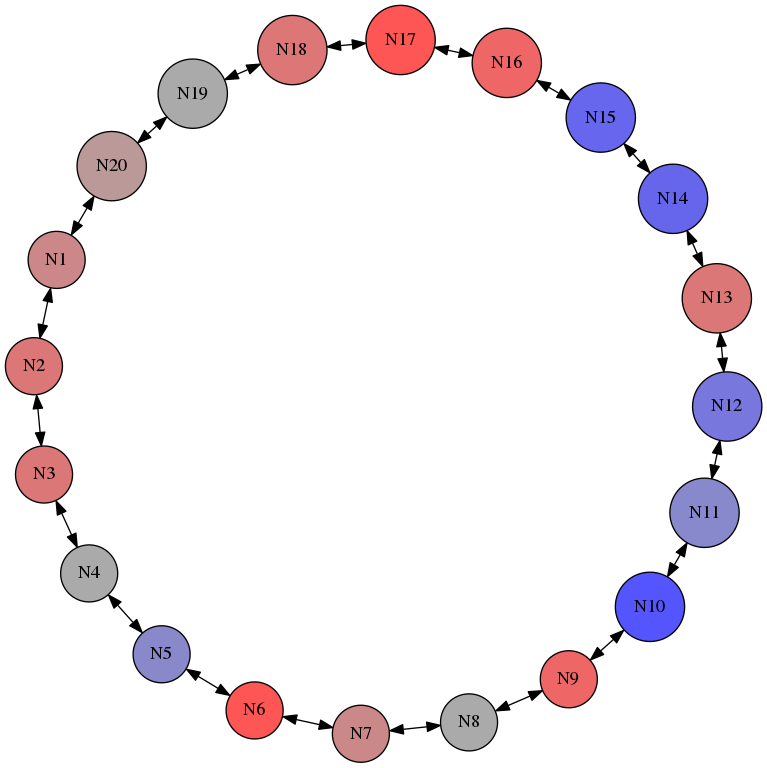

In [138]:
fileNameNN1 = "tmpFileNN1.dot"
filePNGNN1 = "tmpFileNN1.png"
writedlm( string("./",fileNameNN1), [strNN1] ,quotes=false)
run(`neato $fileNameNN1 -Tpng -o $filePNGNN1`)
display("image/png", read(filePNGNN1))

In [112]:
#algorithmics!
using Flux
using Flux: crossentropy, normalise, onecold, onehotbatch
using Statistics: mean








In [10]:



#!!!!!!!!!!VISUALIZATION OF THE MATRIX NETWORK!!!!!!!!!!!!!!
#!!!!!!!!!




#!!!!!!!!!!!!!!

In [11]:
#dataset of synthetic number 2, that is bigger and more complex community associations



In [12]:
#use the Zachary karate club data with preset side splits and infer from the unified set (type of clustering)





In [13]:
#search for a network science dataset that has community labels upon an aggregate of variables





In [14]:
#test on a new dataset that we don't know much about and see if the community labels match the labels we produce





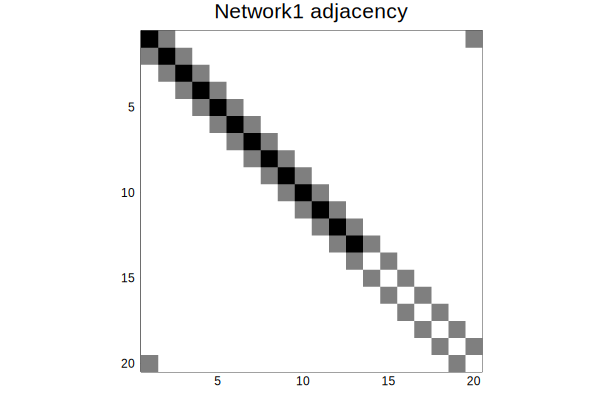


  [1 ,  1]  =  2
  [2 ,  1]  =  1
  [20,  1]  =  1
  [1 ,  2]  =  1
  [2 ,  2]  =  2
  [3 ,  2]  =  1
  [2 ,  3]  =  1
  [3 ,  3]  =  2
  [4 ,  3]  =  1
  [3 ,  4]  =  1
  [4 ,  4]  =  2
  [5 ,  4]  =  1
  [4 ,  5]  =  1
  [5 ,  5]  =  2
  [6 ,  5]  =  1
  [5 ,  6]  =  1
  [6 ,  6]  =  2
  [7 ,  6]  =  1
  [6 ,  7]  =  1
  [7 ,  7]  =  2
  [8 ,  7]  =  1
  [7 ,  8]  =  1
  [8 ,  8]  =  2
  [9 ,  8]  =  1
  [8 ,  9]  =  1
  [9 ,  9]  =  2
  [10,  9]  =  1
  [9 , 10]  =  1
  [10, 10]  =  2
  [11, 10]  =  1
  [10, 11]  =  1
  [11, 11]  =  2
  [12, 11]  =  1
  [11, 12]  =  1
  [12, 12]  =  2
  [13, 12]  =  1
  [12, 13]  =  1
  [13, 13]  =  2
  [14, 13]  =  1
  [13, 14]  =  1
  [15, 14]  =  1
  [14, 15]  =  1
  [16, 15]  =  1
  [15, 16]  =  1
  [17, 16]  =  1
  [16, 17]  =  1
  [18, 17]  =  1
  [17, 18]  =  1
  [19, 18]  =  1
  [18, 19]  =  1
  [20, 19]  =  1
  [1 , 20]  =  1
  [19, 20]  =  1


In [15]:


vLG_NN1 = SimpleGraph(NN1);
for ii in 1:NN1
    for jj in 1:NN1          
        if(ii == (jj+1))
            add_edge!(vLG_NN1,ii,jj)  
        end
        if(ii == jj  && ii<NN1-6)
            add_edge!(vLG_NN1,ii,jj)
        end        
    end
end
add_edge!(vLG_NN1,NN1,1)

tmp = adjacency_matrix(vLG_NN1)
println(tmp)

hAdjNN1 = heatmap(tmp,title="Network1 adjacency",
    showaxis=true,xticks=true,yticks=true,yaxis=:flip,aspect_ratio=1.0,framestyle=:box,xlims=(0.5,NN1+0.5),legend=nothing,
    c=ColorGradient([:white,:black]))
display(hAdjNN1)
#display(gplot(vLG_NN1))
#loc_x, loc_y = layout_spring_adj(AdjNN1)



In [16]:
#visualize a network toy network to start off with
str=""

str *= "graph graphname { node [style=filled] "
str *= "{node [style=filled,color=yellow] a b   d3  } "
str *= "{node [style=filled,color=skyblue] c A2  } "
str *= "a -- b -- c;"
str *= " c -- d3 -- A2 -- a; "
str *= "}"
println(str)
fileName = "tmpFile.dot"
filePNG = "tmpFile.png"
writedlm( string("./",fileName), [str] ,quotes=false)
#run(`dot $fileName -Tpng -o $filePNG`)
run(`neato $fileName -Tpng -o $filePNG`)

graph graphname { node [style=filled] {node [style=filled,color=yellow] a b   d3  } {node [style=filled,color=skyblue] c A2  } a -- b -- c; c -- d3 -- A2 -- a; }


Process(`neato tmpFile.dot -Tpng -o tmpFile.png`, ProcessExited(0))

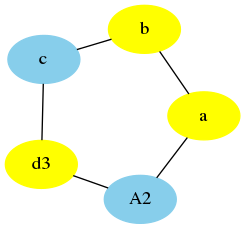

In [17]:
#display the results of the graph
display("image/png", read(filePNG))

strict digraph graphname { concentrate=true node [style=filled] {node [style=filled,color=yellow] N1  N2  N3  N4  N5  N6  N7  N8  N9  N10  N11  N12  N13  N14  N15  N16  N17  N18  N19  N20 }  N1 -> N2 [dir=both]; N1 -> N20 [dir=both]; N2 -> N1 [dir=both]; N2 -> N3 [dir=both]; N3 -> N2 [dir=both]; N3 -> N4 [dir=both]; N4 -> N3 [dir=both]; N4 -> N5 [dir=both]; N5 -> N4 [dir=both]; N5 -> N6 [dir=both]; N6 -> N5 [dir=both]; N6 -> N7 [dir=both]; N7 -> N6 [dir=both]; N7 -> N8 [dir=both]; N8 -> N7 [dir=both]; N8 -> N9 [dir=both]; N9 -> N8 [dir=both]; N9 -> N10 [dir=both]; N10 -> N9 [dir=both]; N10 -> N11 [dir=both]; N11 -> N10 [dir=both]; N11 -> N12 [dir=both]; N12 -> N11 [dir=both]; N12 -> N13 [dir=both]; N13 -> N12 [dir=both]; N13 -> N14 [dir=both]; N14 -> N13 [dir=both]; N14 -> N15 [dir=both]; N15 -> N14 [dir=both]; N15 -> N16 [dir=both]; N16 -> N15 [dir=both]; N16 -> N17 [dir=both]; N17 -> N16 [dir=both]; N17 -> N18 [dir=both]; N18 -> N17 [dir=both]; N18 -> N19 [dir=both]; N19 -> N18 [dir=

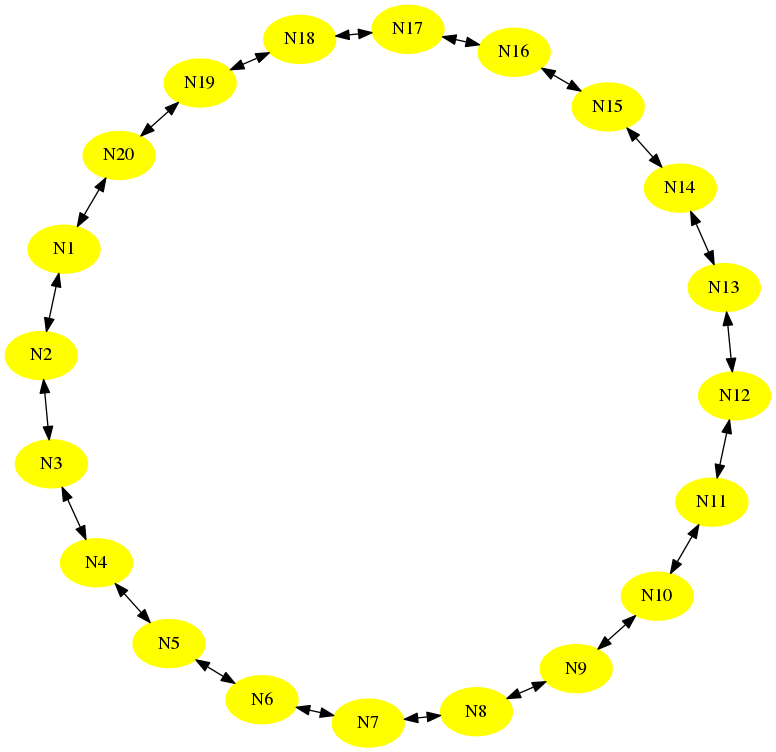

In [18]:
#
#AdjNN1
#str *= "{node [style=filled,color=yellow] a b   d3  } "
#str *= "{node [style=filled,color=skyblue] c A2  } "

strNN1=""
#init
strNN1 *= "strict digraph graphname { concentrate=true node [style=filled] "


#node color switch
strNN1 *= "{node [style=filled,color=yellow]" 
for ii in 1:size(AdjNN1)[1]
        strNN1 *= " N$(ii) "
  
end
strNN1 *= "} " #str *= "{node [style=filled,color=skyblue] c A2  } "

#edges
for ii in 1:size(AdjNN1)[1]
    for jj in 1:size(AdjNN1)[2]
        if(AdjNN1[ii,jj] == 1 )
            if(ii != jj)
                strNN1 *= " N$(ii) -> N$(jj) [dir=both];" #str *= " c -- d3 -- A2 -- a; "
            end
        end
    end
end
#tie off
strNN1 *= "}"
println(strNN1)

fileNameNN1 = "tmpFileNN1.dot"
filePNGNN1 = "tmpFileNN1.png"
writedlm( string("./",fileNameNN1), [strNN1] ,quotes=false)
run(`neato $fileNameNN1 -Tpng -o $filePNGNN1`)
display("image/png", read(filePNGNN1))

digraph {  node [style=filled] {node [style=filled,fillcolor=white shape=circle, fontsize=14 ] 1 }{node [style=filled,fillcolor=white shape=circle, fontsize=14 ] 2 }{node [style=filled,fillcolor=white shape=circle, fontsize=14 ] 3 }{node [style=filled,fillcolor=white shape=circle, fontsize=14 ] 4 }{node [style=filled,fillcolor=white shape=circle, fontsize=14 ] 6 }{node [style=filled,fillcolor=white shape=circle, fontsize=14 ] 7 }{node [style=filled,fillcolor=white shape=circle, fontsize=14 ] 8 }{node [style=filled,fillcolor=white shape=circle, fontsize=14 ] 9 } 1 -> 2 ; 1 -> 10 ; 2 -> 1 ; 2 -> 3 ; 3 -> 2 ; 3 -> 4 ; 4 -> 3 ; 4 -> 5 ; 5 -> 4 ; 5 -> 6 ; 6 -> 5 ; 6 -> 7 ; 7 -> 6 ; 7 -> 8 ; 8 -> 7 ; 8 -> 9 ; 9 -> 8 ; 9 -> 10 ; 10 -> 1 ; 10 -> 9 ;}


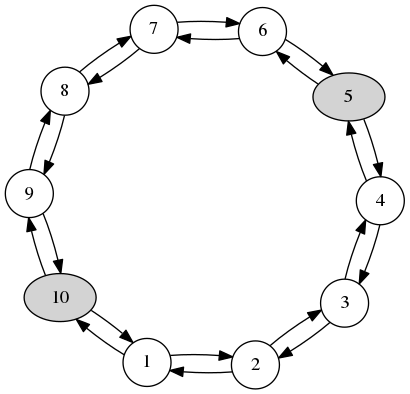

In [19]:
NN1 = 10

AdjNN1 = zeros(NN1,NN1)
for ii in 1:size(AdjNN1)[1]
    for jj in 1:size(AdjNN1)[2]            
        if(ii == (jj+1))
            AdjNN1[ii,jj] = 1
        elseif(ii == (jj-1))
            AdjNN1[ii,jj] = 1
        end        
    end
end
AdjNN1[1,NN1] = 1
AdjNN1[NN1,1] = 1

#make the diagonal for the adj matrix
diag1 = Diagonal(AdjNN1)
diag1 .+= 1
#add self-loops as the paper describes
AdjNN1 .+= diag1
strNN1=""
#init
strNN1 *= "digraph {  node [style=filled] "
#node
for ii in 1:size(AdjNN1)[1]
    if(varX[ii] == 1)
        strNN1 *= "{node [style=filled,fillcolor=white shape=circle, fontsize=14 ]"
        strNN1 *= " $(ii) }"     
    end
end
#edges
for ii in 1:size(AdjNN1)[1]
    for jj in 1:size(AdjNN1)[2]
        if(AdjNN1[ii,jj] == 1 )
            if(ii != jj)
                strNN1 *= " $(ii) -> $(jj) ;" #str *= " c -- d3 -- A2 -- a; "
                
            end
        end
    end
end
#tie off
strNN1 *= "}"
println(strNN1)

fileNameNN1 = "tmpFileNN1.dot"
filePNGNN1 = "tmpFileNN1.png"
writedlm( string("./",fileNameNN1), [strNN1] ,quotes=false)
run(`neato $fileNameNN1 -Tpng -o $filePNGNN1`)
display("image/png", read(filePNGNN1))

["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20"]


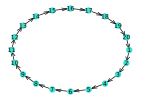

In [27]:
using LightGraphs,GraphPlot,NetworkLayout
h = watts_strogatz(20,2, 0.01,is_directed=true)
nodeStrs = string.(collect(1:20))
println(nodeStrs)

gplot(h,layout=circular_layout,nodelabel = nodeStrs, NODELABELSIZE = 6, nodelabelsize = 0.8,
     edgestrokec = "black")

In [40]:
nodeStrs = string.(collect(1:NN1))
gplot(AdjNN1,layout=circular_layout,nodelabel = nodeStrs, NODELABELSIZE = 6, nodelabelsize = 0.8,
     edgestrokec = "black")

MethodError: MethodError: no method matching _nv(::Array{Float64,2})
Closest candidates are:
  _nv(!Matched::AbstractGraph) at /home/al062959/.julia/packages/GraphPlot/4prMP/src/GraphPlot.jl:38

In [35]:
using NetworkLayout:Spring
lt = Layout(AdjNN1,2,iterations=10)

gplot(h, layout = lt ,nodelabel = nodeStrs, NODELABELSIZE = 6, nodelabelsize = 0.8,
     edgestrokec = "black")



UndefVarError: UndefVarError: Layout not defined

In [38]:
using LightGraphs
using NetworkLayout:Stress
g = CompleteGraph(10)
a = adjacency_matrix(g) # generates a sparse adjacency matrix
network = layout(a,2) # generate 2D layout

┌ Warning: `CompleteGraph` is deprecated, use `complete_graph` instead.
│   caller = top-level scope at In[38]:3
└ @ Core In[38]:3


UndefVarError: UndefVarError: layout not defined